# Project Description

This project is about how star rate is important in Restaurant & Cafe (named as R&C afterwards) industry. 

For this research YELP dataset will be used.

# Data Preparation

In [2]:
#Library section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

First let's open the file

In [3]:
bus_df = pd.read_json(r'business.json', lines = True)
bus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 14 columns):
address         192609 non-null object
attributes      163773 non-null object
business_id     192609 non-null object
categories      192127 non-null object
city            192609 non-null object
hours           147779 non-null object
is_open         192609 non-null int64
latitude        192609 non-null float64
longitude       192609 non-null float64
name            192609 non-null object
postal_code     192609 non-null object
review_count    192609 non-null int64
stars           192609 non-null float64
state           192609 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 20.6+ MB


In [4]:
bus_df.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON


In [5]:
bus_df.attributes[1]

{'RestaurantsReservations': 'True',
 'GoodForMeal': "{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': True, 'brunch': False, 'breakfast': False}",
 'BusinessParking': "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}",
 'Caters': 'True',
 'NoiseLevel': "u'loud'",
 'RestaurantsTableService': 'True',
 'RestaurantsTakeOut': 'True',
 'RestaurantsPriceRange2': '2',
 'OutdoorSeating': 'False',
 'BikeParking': 'False',
 'Ambience': "{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}",
 'HasTV': 'False',
 'WiFi': "u'no'",
 'GoodForKids': 'True',
 'Alcohol': "u'full_bar'",
 'RestaurantsAttire': "u'casual'",
 'RestaurantsGoodForGroups': 'True',
 'RestaurantsDelivery': 'False'}

Now we have uploaded the dataset with almost 200k rows, however it contains all busineses. For our research we have to  filter only those that relate to FOOD Industry. But first, lets work a bit with 'categories' column in order to see, what are the most top categories and which relate to food.

In [6]:
# Drop off Null values from categories
bus_df = bus_df[bus_df.categories.notnull()]
bus_df.shape

(192127, 14)

In [7]:
# categories transfromation and cleaning
def words_to_elements(string):
    text_clean = re.sub('\s+',' ', string).strip().lower()#.replace(" ","").split(",")
    return text_clean
bus_df['cat_clean'] = bus_df.categories.apply(words_to_elements)

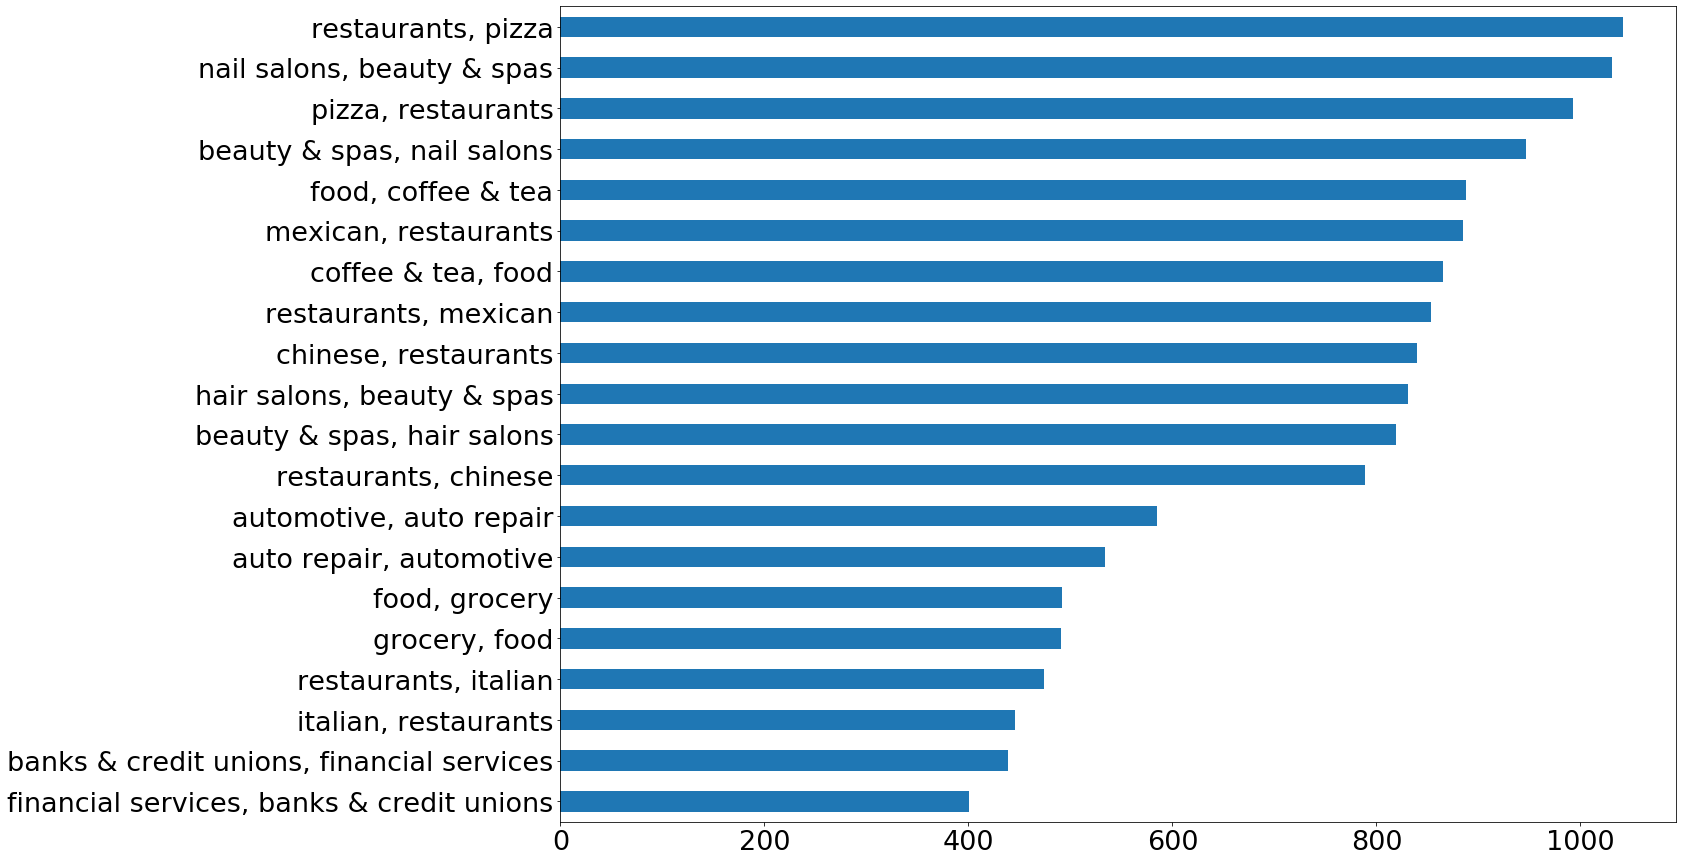

In [12]:
temp_ser =pd.Series(bus_df.cat_clean.tolist())
temp_ser.value_counts().head(20).sort_values(ascending = True).plot.barh(figsize = (20,15))
plt.rcParams.update({'font.size': 26})
#plt.savefig('categories.png')

Well from the plot above we can see that obviously 'restaurants' category is the most powerful among whole dataset. So deffinetly we will pick it up for our R&C industry observation. Moreover we will also collect 'pizza' and 'tea'. We will not take 'food' as it also might relate to 'grocery' category, which we are not interested in. Thus let's update our dataFrame with new category. 

In [13]:
word = 'restaurants|pizza|coffee'
resta = bus_df.categories.str.contains(word,flags=re.IGNORECASE, regex = True, na = False)

rest = bus_df[resta]
rest.shape

(63056, 15)

Now our dataset decreased to a bit more then 60k. Lets update the index and store our new dataset to our physical memory.

In [14]:
#rest = rest.reset_index(drop = True)
#rest.to_csv('restaurants_business.csv', index = False)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#Library section
import pandas as pd
import numpy as np
import matplotlib as pyplot
#import seaborn as sns
import re

In [ ]:
rest = pd.read_csv('restaurants_business.csv')

So as a reminder our purpose is to find out how star rating influence the business behavior in R&C industry a?

First we will work with the second part of the problem and will try to find out the which features correlate to star raiting.

Thus lets again take a look on our data frame and see what can we do with it.

In [ ]:
rest.info()

We have quite interesting column named 'attributes'. It would be great to unpack it, however 1st we should check the format of it.

In [ ]:
#attr = pd.DataFrame(rest.attributes)
attr = rest[['business_id','attributes']]
attr.attributes[1]

Oh no. Does not look good at all. It pretend to be a python dictionary, or json, but it is non of these and it is not possible to work with it at all. Thus, before extarcting any useful data from there, we have to make real spring cleaning. Let's write the function that will first transfrom our string formated inputs into rigth format. Afterwards with the use of 'ast' library, we will convert it to 'python dictionary' format.

In [ ]:
def clean_to_python_dict(messy_jucy_jason):
    if isinstance(messy_jucy_jason, str):   
        from ast import literal_eval
        cleaning = messy_jucy_jason.replace("'",'"').replace('"u"','"').replace('""','"').replace('"',"'").replace("'{'", "{'").replace("'}'","}").replace("}'","}").replace("'True'","True").replace("'False'","False").replace("'{", "{")
        python_dict_finally = literal_eval(cleaning)
        return python_dict_finally
    else:
        return messy_jucy_jason
attr['attr_dicts']= attr.attributes.apply(clean_to_python_dict)
attr = attr[['business_id','attr_dicts']]

In [ ]:
attr.head()

Now much better. We can work with it.

So the next step is to unpack all vocabularies and see, what we have. For this purpose we will write the function, that will unpack dictionaries level by level. In other words, if we unpack once, and store it to dataframe and see that in some columns we will notice another dictionaries - then we unpack again, until no dictionaries left.

In [ ]:
#clmn_names_with_dicts
def unpack(df):
    dict_store_df=pd.DataFrame({'business_id':[]})
    #for clmn_num in range(df.shape[1]):
    for clm in df:
        dict_package_lst = []
        index = []
        #df.iloc[:,clmn_num]
        for i in range(len(df)):
            if isinstance (df[clm][i], dict):
                dict_package_lst.append(df[clm][i])
                index.append(df['business_id'][i])
        new_df = pd.DataFrame(dict_package_lst, dtype=object)
        new_df.insert(0,'business_id', index, True)
        #original#dict_store_df = dict_store_df.append(new_df,)
        dict_store_df = pd.merge(dict_store_df,new_df, how = 'outer')
    return dict_store_df
#fst_dict_df = unpack(unpack_dict_df)

In [85]:
unpack_dict_df  = unpack(attr)
print(unpack_dict_df.shape)
unpack_dict_df.head(1)

(60713, 40)


,business_id,AcceptsInsurance,AgesAllowed,Alcohol,Ambience,BYOB,BYOBCorkage,BestNights,BikeParking,BusinessAcceptsBitcoin,...,RestaurantsCounterService,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,Smoking,WheelchairAccessible,WiFi
0,QXAEGFB4oINsVuTFxEYKFQ,NaN,NaN,full_bar,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,False,NaN,...,NaN,False,True,2,True,True,True,NaN,NaN,no


Alright, first level is done and we got new dataframe, with 40 columns. Now is time to write the function that will return us the list with column names in our DF where we still left some dictionary data.

In [84]:
# Function returns list with columns containing dictionaries
def find_dict_columns(df):
    dict_columns_lst =[]
    for clm in df:
        df1 = df[clm][df[clm].notnull()]
        for i in df1.index: #range(len (df)):
            if isinstance (df1.loc[i], dict):
                dict_columns_lst.append(clm)
                break
    return dict_columns_lst

In [86]:
find_dict_columns(attr)

['attr_dicts']

Test above, shows that our function works. Thus we will go with the following script:
1. Replace possible Nan values, such as 'None', 'none' to actual None value format
2. run find_dict_columns function to return the list with dictionary columns
3. merge DataFrames (previously created with new one, containing next level dictionaries)
4. drop columns, with dictionaries returned on 2nd step
5. run steps 1-4 while len(list) on 2nd step will not be equal to 0

The question is why would not we put it in a loop? Well the problem is that step number 2 is quite heavy and at least on my machine (Windows 10, 4 cores, 8 GB RAM) the error comes up, while running as a one cell. Thus will do it manually.

In [87]:
unpack_dict_df = unpack_dict_df.replace(['None','none'], None)

In [88]:
unpack_dict_lst = find_dict_columns(unpack_dict_df)
unpack_dict_lst

['Ambience',
 'BestNights',
 'BusinessParking',
 'DietaryRestrictions',
 'GoodForMeal',
 'HairSpecializesIn',
 'Music']

In [90]:
#unpack_dict_df = unpack_dict_df.append(unpack(unpack_dict_df))
unpack_dict_df = pd.merge(unpack_dict_df,unpack(unpack_dict_df), how = 'outer')
unpack_dict_df = unpack_dict_df.drop(unpack_dict_lst, axis = 1)

In [91]:
unpack_dict_df.shape

(60713, 82)

In [92]:
unpack_dict_lst = find_dict_columns(unpack_dict_df)
unpack_dict_lst

[]

In [96]:
unpack_dict_df.shape

(60713, 82)

Done. All dictionaries are unpacked and stored to our new data frame. Next step would be to make data exploration on our new data frame. However, before we will store it as a new csv.

In [97]:
#unpack_dict_df.to_csv('attributes_unpacked_business.csv', index = False)

------------------------------------------------------------------------------------------------------------------------

### Attributes data frame preprocessing

In [1]:
#Library section
import pandas as pd
import numpy as np
import matplotlib as pyplot

In [2]:
unpack_dict_df = pd.read_csv('attributes_unpacked_business.csv')

D:\Programs\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2,20,23,67,68,69,70,71,72,73,74) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
unpack_dict_df = unpack_dict_df.replace(['None','none'], None)

In [4]:
print (unpack_dict_df.shape)
#print(unpack_dict_df.info())

(60713, 82)


In [5]:
print('NUll rate in %')
na_rate = round(unpack_dict_df.isnull().sum()/len(unpack_dict_df)*100, 2).sort_values(ascending = True)
na_rate
#na_rate[(na_rate<90) and (na_rate>)]


NUll rate in %


business_id                     0.00
RestaurantsPriceRange2          8.56
RestaurantsTakeOut              9.37
OutdoorSeating                 15.49
RestaurantsGoodForGroups       15.93
valet                          16.35
lot                            16.36
garage                         16.36
validated                      16.36
street                         16.36
GoodForKids                    16.44
RestaurantsReservations        16.87
RestaurantsDelivery            17.23
RestaurantsAttire              20.03
HasTV                          26.02
touristy                       26.13
romantic                       26.13
intimate                       26.13
casual                         26.13
classy                         26.13
trendy                         26.13
upscale                        26.41
hipster                        27.07
WiFi                           28.24
BikeParking                    31.26
NoiseLevel                     32.33
divey                          38.13
C

In [6]:
rows_to_drop = na_rate[na_rate<20].index
rows_to_drop

Index(['business_id', 'RestaurantsPriceRange2', 'RestaurantsTakeOut',
       'OutdoorSeating', 'RestaurantsGoodForGroups', 'valet', 'lot', 'garage',
       'validated', 'street', 'GoodForKids', 'RestaurantsReservations',
       'RestaurantsDelivery'],
      dtype='object')

In [7]:
rows_droped_df = unpack_dict_df.dropna(subset =rows_to_drop)
rows_droped_df.shape

(39249, 82)

In [8]:
clmn_rows_droped_df = rows_droped_df.loc[:,na_rate<60]
clmn_rows_droped_df.shape

(39249, 36)

In [9]:
df = clmn_rows_droped_df
#df = clmn_rows_droped_df
columns = df.columns
uniq = [df[x].unique() for x in df]
uniq_runiq_r = np.column_stack((columns, uniq))

In [10]:
n=0
for i in uniq_runiq_r[1:]:
    n+=1
    print(n,i[0],":",i[1])

1 Alcohol : ['full_bar' 'beer_and_wine' nan]
2 BikeParking : [False True nan]
3 BusinessAcceptsCreditCards : [nan True False]
4 Caters : [True False nan]
5 GoodForKids : [True False]
6 HasTV : [False True nan]
7 NoiseLevel : ['loud' 'average' nan 'quiet' 'very_loud']
8 OutdoorSeating : [False True]
9 RestaurantsAttire : ['casual' nan 'dressy' 'formal']
10 RestaurantsDelivery : [False True]
11 RestaurantsGoodForGroups : [True False]
12 RestaurantsPriceRange2 : [2. 1. 3. 4.]
13 RestaurantsReservations : [True False]
14 RestaurantsTakeOut : [True False]
15 WiFi : ['no' nan 'free' 'paid']
16 casual : [True False nan]
17 classy : [False True nan]
18 divey : [False nan True]
19 hipster : [False nan True]
20 intimate : [False nan True]
21 romantic : [False True nan]
22 touristy : [False nan True]
23 trendy : [False nan True]
24 upscale : [False nan True]
25 garage : [False True]
26 lot : [True False]
27 street : [False True]
28 valet : [False True]
29 validated : [False True]
30 breakfast : [

In [11]:
#clmn_rows_droped_df[clmn_rows_droped_df== True] #= 1
#clmn_rows_droped_df[clmn_rows_droped_df==False] = 0
clmn_rows_droped_df = clmn_rows_droped_df.replace(True, int(1)) 
clmn_rows_droped_df = clmn_rows_droped_df.replace(False, int(0)) 

In [12]:
clmn_rows_droped_df.head(2)

,business_id,Alcohol,BikeParking,BusinessAcceptsCreditCards,Caters,GoodForKids,HasTV,NoiseLevel,OutdoorSeating,RestaurantsAttire,...,lot,street,valet,validated,breakfast,brunch,dessert,dinner,latenight,lunch
0,QXAEGFB4oINsVuTFxEYKFQ,full_bar,0.0,NaN,1.0,1,0.0,loud,0,casual,...,1,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
1,gnKjwL_1w79qoiV3IC_xQQ,beer_and_wine,1.0,1.0,0.0,1,1.0,average,0,casual,...,1,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0


In [13]:
clmn_rows_droped_df.columns

Index(['business_id', 'Alcohol', 'BikeParking', 'BusinessAcceptsCreditCards',
       'Caters', 'GoodForKids', 'HasTV', 'NoiseLevel', 'OutdoorSeating',
       'RestaurantsAttire', 'RestaurantsDelivery', 'RestaurantsGoodForGroups',
       'RestaurantsPriceRange2', 'RestaurantsReservations',
       'RestaurantsTakeOut', 'WiFi', 'casual', 'classy', 'divey', 'hipster',
       'intimate', 'romantic', 'touristy', 'trendy', 'upscale', 'garage',
       'lot', 'street', 'valet', 'validated', 'breakfast', 'brunch', 'dessert',
       'dinner', 'latenight', 'lunch'],
      dtype='object')

In [17]:
new_na_rate= round(clmn_rows_droped_df.isna().sum()/len(clmn_rows_droped_df)*100, 2).sort_values(ascending = False)
new_na_rate[new_na_rate>0]

lunch                         35.27
dinner                        35.27
dessert                       35.27
brunch                        35.27
breakfast                     35.27
latenight                     35.27
BusinessAcceptsCreditCards    33.01
Alcohol                       22.22
Caters                        21.43
divey                         17.17
BikeParking                   16.18
WiFi                          11.97
NoiseLevel                     9.29
hipster                        5.72
upscale                        5.23
casual                         4.95
classy                         4.95
intimate                       4.95
romantic                       4.95
touristy                       4.95
trendy                         4.95
HasTV                          4.49
RestaurantsAttire              0.99
dtype: float64

### Filling NA 

Now is the time to fill our missing values. There are several methods to execute it and the primary ones are:
- Filling missing values with a test statistic
- Predictive model for handling missing data (ML)

These methods are more explained by link: https://towardsdatascience.com/the-tale-of-missing-values-in-python-c96beb0e8a9d

In this research we will go with the first one.

Let's devide then our columns for different fillna methods.



In [23]:
missing_less_10 = new_na_rate[(new_na_rate>0) & (new_na_rate<=10)]
#missing_less_10 = clmn_rows_droped_df[missing_less_10.index]
print('missing_less_10','-',clmn_rows_droped_df[missing_less_10.index].shape)

missing_more_10 = new_na_rate[new_na_rate>10]
#missing_more_10 = clmn_rows_droped_df[missing_more_10.index]
print('missing_more_10','-',clmn_rows_droped_df[missing_more_10.index].shape)

missing_less_10 - (39249, 11)
missing_more_10 - (39249, 12)


In [ ]:
#from sklearn.preprocessing import Imputer
#imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
#imp.fit(missing_less_10)
#train= imp.transform(missing_less_10)


In [25]:
clmn_rows_droped_df[missing_less_10.index] = clmn_rows_droped_df[missing_less_10.index].fillna( method='backfill')

In [38]:
(clmn_rows_droped_df.isnull().sum()/len(clmn_rows_droped_df)*100).sort_values(ascending = False)

lunch                         35.27
dinner                        35.27
dessert                       35.27
brunch                        35.27
breakfast                     35.27
latenight                     35.27
BusinessAcceptsCreditCards    33.01
Alcohol                       22.22
Caters                        21.43
divey                         17.17
BikeParking                   16.18
WiFi                          11.97
NoiseLevel                     9.29
hipster                        5.72
upscale                        5.23
casual                         4.95
classy                         4.95
intimate                       4.95
romantic                       4.95
touristy                       4.95
trendy                         4.95
HasTV                          4.49
RestaurantsAttire              0.99
dtype: float64

In [40]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
cleaned_at_df = imp.fit_transform(clmn_rows_droped_df)
cleaned_at_df = pd.DataFrame(cleaned_at_df, columns =clmn_rows_droped_df.columns )

In [42]:
new_na_rate= round(cleaned_at_df.isna().sum()/len(cleaned_at_df)*100, 2).sort_values(ascending = False)
new_na_rate[new_na_rate>0]

Series([], dtype: float64)

Lovely empty Series. It measn that our data does not have any missing values. Now we will store our file and use it further for our descriptive analysis, but as traditionally, save first.

In [43]:
cleaned_at_df.to_csv('attributes_unpacked_business.csv', index = False)

---------------------------------------------------------------------------------------------------------------------------------------------------------------